## **`Advance concept in neural network`**
---

## **Weight initialization** 

* Before we start training the network with gradient descent, we need to
initialize the weights. <br/>

* Initializing all the weights to the same value(eg 0) is not a good choice
because all the neurons of a given layer will behave in exactly the same way!

  `Question` : will neuron network converge if weights are initilized to zero ?<br/>
Answer : No

## **Random Initialization**

* To prevent neurons of a layer from behaving identically, we can ‘break the
symmetry’ by randomly initializing weights (eg sampling from a Gaussian
distribution).
* This method works for small networks, but we encounter problems with
deeper networks
* Randomaly weights initialization is leads gradient explosion and gradient vanishinng problem.
* Thier is some problem with lower layer they some time saturate very quickly.

#### **`Problem when weights are too small`**

* Let’s say the weights initialized are too small. The output of sigmoid or tanh is bounded between -1 and +1, so multiplying these by small weights will push the inputs to the next layer close to 0 ; and in deeper networks activations of neurons in deeper layers will become very close to 0 (with small variance).

      Eventually the activations become close to 0.
      For the backward pass we calculate dW by
      multiplying dX with Y ; and dY by multiplying dX
      with W. Since both W and Y are small, both
      gradients are also small and the weights won’t
      get updated properly in the descent step

#### **`Problem when weights are too large`**

* If the weights are too large, then the variance of neurons increases rapidly as
  we move deeper and we get stuck in the saturation regions of the activation
  functions where the gradient is very small.

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/ZLshz8R/Random-init.jpg" alt="Random-init" border="0"></a>

  Due to very small gradients, we again face problems in training the
  neural network.


####**`Problem: Saturation of activations`**

* Activations saturate for the lower layers first, then upper
layers.

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/w6zyfc0/saturatation-of-activation.jpg" alt="saturatation-of-activation" border="0" width="70%"></a>

  The weights are initilized in such way that variance of the each layer is not so spread out for activation 
and for backward propagation the gradient should be no be thin for starting layer.<br/>
##### **`Y axis`** : frequancy of activation or frequancy of value of the gradient. 

 <a href="https://ibb.co/3FRN7cM"><img src="https://i.ibb.co/vdXPHkQ/Screenshot-411.png" alt="Screenshot-411" border="0" width="60%"></a>


















###**Xavier initialization**

* We know that diminishing and exploding variance with each passing layer is
linked with very small gradients. Xavier initialization is a technique which aims
at keeping the variance of the outputs of hidden layers equal to that of its
input and hence constant throughout.
* The weights for each layer are initialized by sampling from a Gaussian
distribution with mean 0 and variance equal to 1/(n) where n is the number of
inputs to the layer.
* Xavier initialization works well with the assumption that we are in the
approximately linear region of the activation function
```
Xaviar initialization : used for tanh 
```

###**He Initialization**

* Xavier initialization does not work well with the ReLU activation function. The
intuition is that when the weights are sampled from the Gaussian distribution,
approximately half of the outputs will be positive and half negative. 

* Since ReLU kills off the negative part, the next layer effectively sees only half of the previous layers outputs and to keep the variances same, we should take the variance = 2/n where n is the number of outputs of the previous layer.

  ```
  He initialization : used for Relu
  ```

###**Goal of weight inilization**

* In forward pass , first of all the distribution of each layer should be similar , variance of each layer should be same .
* They should not saturate due gradient explosion and gradient vanishing problem.



---

### **Understanding use of derivative and Gradient descent**
---

  <a href="https://ibb.co/sFqGvxh"><img src="https://i.ibb.co/xM60S9y/Gradient-1.jpg" alt="Gradient-1" border="0" width="60%"></a>

<a href="https://ibb.co/hspxcK2"><img src="https://i.ibb.co/p2C6Q34/Double-Derivative.jpg" alt="Double-Derivative" border="0" width="60%"></a>

  <a href="https://ibb.co/dgpyrmN"><img src="https://i.ibb.co/0t93cs0/Gradient-2.jpg" alt="Gradient-2" border="0" width="60%"></a>

  <a href="https://ibb.co/mhmMrkM"><img src="https://i.ibb.co/HG0kL6k/Gradient-3.jpg" alt="Gradient-3" border="0" width="60%"></a>

Step size decide by learning rate and gradient.



---
### **Understanding of curve and points**
---
*  #### **`Minima and maxima points`**

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/3WrNtz2/global-minima.png" alt="global-minima" border="0"></a>
  
  ---

*  #### **`Saddle point`** : If we have 3D curvature , if we look from one plane 
we encounter the point is going in local minima (Gradient is zero), if we see in another side of the plane
we see that point is at local maxima (Gradient is positive and negative).
  
  Some variables may have reached a local minima while others have not

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/4sn2KQ9/3D-Graph.jpg" alt="3D-Graph" border="0" width="35%"></a>

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/qrWx8jf/Local-minima-and-saddle.png" alt="Local-minima-and-saddle" border="0"></a>
  
  ---

  <a href="https://ibb.co/3vfrKz1"><img src="https://i.ibb.co/ZSHL9md/Backpropagation.jpg" alt="Backpropagation" width="60%" border="0"></a>

*  RELU is convex function<br/>
*  Loss(CE) is convex function<br/>
*  Softmax is not convex function<br/>

  *  if we have 2 function i.e. F and G if they both are convex then F(G) will also be convex.

    Important things the loss function in Neural network would not be convex their are only local minimas i.e. it can be any concave function which contain lot of minima and maxima .


---

### **Learning rate scheduling**   
---
* High learning rates explore faster earlier – But, they can lead to divergence or high final loss.
* Low learning rates fine-tune better later – But, they can be very slow to converge.
* LR scheduling combines advantages of both – Lots of schedules possible: linear, exponential, square-root, step-wise,cosine

  <a href="https://ibb.co/ChXc1SS"><img src="https://i.ibb.co/nzVGgKK/Learning-rate.png" alt="Learning-rate" border="0" width="50%"></a>

#### **`Why do we not get stuck in bad local minima?`**

* Local minima are close to global minima in terms of
errors. <br/>
* Saddle points are much more likely at higher
portions of the error surface (in high-dimensional
weight space). <br/>
* SGD (and other techniques) allow you to escape the
saddle points.


---
### **Hessian of a function of a vector**
---
  <a href="https://ibb.co/hK4pnJc"><img src="https://i.ibb.co/XzKmdrD/Hessian.jpg" alt="Hessian" border="0" width="60%"></a>

  If all eigenvalues of a Hessian matrix are positive, then the function is
  convex and we reach local point.

  but if some eigenvalues of a Hessian matrix are negitive, then we reach at Saddle point.

  **Critical point** : when gradient is zero
  
   <a href="https://ibb.co/0J5GcJr"><img src="https://i.ibb.co/4NkV7Np/Points.jpg" alt="Points" border="0" width="60%"></a>

  * Plateau : 1st and 2nd derivative will be zero
  * Local Minima : 1st derivative is zero but the second derivative is positive
  * Saddle point : Some are positive and some are negative
  * Long furrow : some are zero in direction of line and some are positive 



### **`Noise can be added in other ways to escape saddle points`**

* Random mini-batches / SGD
* Add noise to the gradient or the update
* Add noise to the input

### **`GD vs SGD`**

  <a href="https://ibb.co/y5QvsLf"><img src="https://i.ibb.co/7V1My7Y/GD-Vs-SGD.jpg" alt="GD-Vs-SGD" border="0" width="50%"></a>

  * GD gives you only one perticular direction and that will be your update.
  * SGD we take random substate and we go in many direction.
  * GD requires more computations per update.
  * SGD is more noisy.

### **`Different type of optimizer`**

* ### **`GD (Gradient descent)`**

  [<img src="https://image.slidesharecdn.com/machinelearningpt-170131220048/95/machine-learning-pt1-artificial-neural-networks-all-rights-reserved-43-638.jpg?cb=1488991585"/>](https://image.slidesharecdn.com/machinelearningpt-170131220048/95/machine-learning-pt1-artificial-neural-networks-all-rights-reserved-43-638.jpg?cb=1488991585)

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/ZKVwdLH/Screenshot-397.png" alt="Screenshot-397" border="0"></a>

* ### **`SGD (Stochastic Gradient Descent)`**

  This is the basic algorithm responsible for having neural networks converge, i.e. we shift towards the optimum of the cost function.

  SGD :

    <a href="https://imgbb.com/"><img src="https://i.ibb.co/3B24710/Screenshot-398.png" alt="Screenshot-398" border="0"></a>

  BGD :

    <a href="https://imgbb.com/"><img src="https://i.ibb.co/sVRTMrv/Screenshot-403.png" alt="Screenshot-403" border="0"></a>

  The basic difference between `batch gradient descent (BGD)` and `stochastic gradient descent (SGD)`, is that we only calculate the cost of one example for each step in SGD, but in BGD, we have to calculate the cost for all training examples in the dataset. Trivially, this speeds up neural networks greatly. Exactly this is the motivation behind SGD.

  The equation for SGD is used to update parameters in a neural network – we use the equation to update parameters in a backwards pass, using backpropagation to calculate the gradient  ∇:
  ### `θ = θ − η ⋅ ∇θJ(θ;x,y)`
  
  This is how the equation is presented formally, and here is what each symbol means:

* `θ` is a parameter (theta), e.g. your weights, biases and activations. Notice that we only update a single parameter for the neural network here, i.e. we could update a single weight.

* `η` is the learning rate (eta), but also sometimes alpha α or gamma γ is used.

* `∇` is the gradient (nabla) 
* `J` is formally known as objective function, but most often it's called cost function or loss function.

  We take each parameter theta θ and update it by taking the original parameter 
  `θ` and subtract the learning rate η times the ratio of change `∇J(θ)`.

  ##### `J(θ;x,y)` just means that we input our parameter theta θ along with a training example and label (e.g. a class). The semicolon is used to indicate that the parameter theta θ is different from the training example and label, which are separated by a comma.

  Classical Algorithm and Code For each parameter theta θ, from 1 to j, we update according to this equation.

  #### `θj = θj − η⋅(∂C / ∂θj)`

  Usually, this is equation is wrapped in a **`repeat until convergence`**, i.e. we update each parameter, for each training example, until we reach a local minimum.

  <img src="https://i.ibb.co/J28xvWk/gradient-descent-optimized-1.gif" alt="gradient-descent-optimized-1" border="0" width="50%" />
  
  Running through the dataset multiple times is usually done, and is called an **`epoch`**, and for each epoch, we should randomly select a subset of the data – this is the stochasticity of the algorithm

  ### **`Pros`**

  * Relatively fast compared to the older gradient descent approaches.
  * SGD is comparatively easy to learn for beginners, since it is not as math heavy as the newer approaches to optimizers.
  
  ### **`Cons`**

  * Converges slower than newer algorithms.
  * Has more problems with being stuck in a local minimum than newer approaches.
  * Newer approaches outperform SGD in terms of optimizing the cost function.

* ### **`Momentum`** <br/>
  Simply put, the momentum algorithm helps us progress faster in the neural network, negatively or positively, to the ball analogy. This helps us get to a local minimum faster.

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/mCJMCfz/Screenshot-406.png" alt="Screenshot-406" border="0" width="60%"></a>

  ### **`Motivation for momentum`** <br/>
  For each time we roll the ball down the hill (for each epoch), the ball rolls faster towards the local minima in the next iteration. This makes us more likely to reach a better local minima (or perhaps global minima) than we could have with SGD.

  <img src="https://i.ibb.co/k3xC4q7/ball-1.gif" alt="ball-1" border="0" width="50%" />

  The slope of the cost function is not actually such a smooth curve, but it's easier to plot to show the concept of the ball rolling down the hill. The function will often be much more complex, hence we might actually get stuck in a local minimum or significantly slowed down. Obviously, this is not desirable. The terrain is not smooth, it has obstacles and weird shapes in very high-dimensional space – for instance, the concept would look like this in 2D:

  <a href="https://ibb.co/h9tpgVt"><img src="https://i.ibb.co/c37zyQ7/Hill-area.png" alt="Hill-area" border="0" width="50%"></a>

  In the above case, we are stuck at a local minimum, and the motivation is clear –  we need a method to handle these situations, perhaps to never get stuck in the first place.

  Now we know why we should use momentum, let's introduce more specifically what it means, by explaining the mathematics behind it.

  ### **`Explanation of momentum`**
  Momentum is where we add a temporal element into our equation for updating the parameters of a neural network – that is, an element of time.

  This time element increases the momentum of the ball by some amount. This amount is called `gamma` 
  γ, which is usually initialized to 0.9. But we also multiply that by the previous update vt.

  What I want you to realize is that our function for momentum is basically the same as SGD, with an extra term:

  `θ = θ − η∇J(θ) + γvt` <br/>

  Let's just make this 100% clear: <br/>

* `Theta θ` is a parameter, e.g. your weights, biases or activations.
* `Eta η` is your learning rate, also sometimes written as alpha α or epsilon ϵ.
* `Objective function J`, i.e. the function which we are trying to optimize. Also called cost function or loss function (although they have different meanings).
* `Gamma γ`, a constant term. Also called the momentum, and rho ρ is also used instead of γ sometimes.
* Last change (last update) to θ is called `vt`.

  <img src="https://i.ibb.co/8c5d1J9/increasing-momentum.gif" alt="increasing-momentum" border="0" width="60%"/>
  
  ### **`Momentum Term`**
  I told you about the ball rolling faster and faster down the hill, as it accumulates more speed for each epoch, and this term helps us do exactly that.

  What helps us accumulate more speed for each epoch is the momentum term, which consists of a constant γ and the previous update γvt to θ. But the previous update to θ also includes the second last update to θ and so on.

  vt = η∇J(θ<sub>t−1</sub>)+v<sub>t−1</sub>

  Essentially, we store the calculations of the gradients (the updates) for use in all the next updates to a parameter θ
  . This exact property causes the ball to roll faster down the hill, i.e. we converge faster because now we move forward faster.

  Instead of writing v<sub>t−1</sub>, which includes v<sub>t−2</sub>
  in it's equation and so on, we could use summation, which might be more clear. We can summarize at tau τ equal to 1 , all the way up to the current time step t .

  <a href="https://imgbb.com/"><img src="https://i.ibb.co/XbBNhJ9/Momemtun.jpg" alt="Momemtun" border="0"></a>

  <img src="https://i.ibb.co/R3cKV2k/no-momentum.gif" alt="no-momentum" border="0" width="40%">

  <img src="https://i.ibb.co/z57BspD/momentum-1.gif" alt="momentum-1" border="0" width="40%">

  We can think of optimizing a cost function with SGD as oscillating up and down along the y-axis, and the bigger the oscillation up and down the y-axis, the slower we progress along the x-axis. Intuitively, it then makes sense to add something (momentum) to help us oscillate less, thus moving faster along the x-axis towards the local minima.
    
    ↕ slower convergence <br/>
    ↔ faster convergence

  ### **`Pros`**
  
  Faster convergence than traditional SGD <br/>
    
  ### **`Cons`**

    As the ball accelerates down the hill, how do we know that we don't miss the local minima? If the momentum is too much, we will most likely miss the local minima, rolling past it, but then rolling backwards, missing it again. If the momentum is too much, we could just swing back and forward between the local minima.

## **`Adaptive learning rate optimizers`**
	1. Adagrad (Adaptive gradient)
	2. AdaDelta 
	3. RmsProp (Root mean square)
	4. Adam	

  ### **`Adaptive Learning Rate`** <br/>

  An adaptive learning rate can be observed in AdaGrad, AdaDelta, RMSprop and Adam, but I will only go into AdaGrad and RMSprop, as they seem to be the relevant one's (although AdaDelta has the same update rule as RMSprop). The adaptive learning rate property is also known as Learning Rate Schedules.

  Part of the intuition for adaptive learning rates, is that we start off with big steps and finish with small steps – almost like mini-golf. We are then allowed to move faster initially. As the learning rate decays, we take smaller and smaller steps, allowing us to converge faster, since we don't overstep the local minimum with as big steps.

  ### **`AdaGrad: Parameters Gets Different Learning Rates`**

  Adaptive Gradients (AdaGrad) provides us with a simple approach, for changing the learning rate over time. This is important for adapting to the differences in datasets, since we can get small or large updates, according to how the learning rate is defined.
  
  Let's go for a top to bottom approach; here is the equation:
  
  <img src="https://i.ibb.co/GnrWNKj/Adagrad-equation.jpg" alt="Adagrad-equation" border="0">
  
  All we added here is division of the learning rate eta η. Although I told you that ϵ sometimes is the learning rate, in this algorithm it is not. In fact, it's just a small value that ensures that we don't divide by zero.

What needs explaining here is the term <img src="https://i.ibb.co/2gkFymF/Aadagrad-2.jpg" alt="Aadagrad-2" border="0" width="20%">
, i.e. the square root of the summation ∑
 over all gradients squared. We sum ovralte gradients, from time step 
 τ = 1 all the way to the current time step t.

 <img src="https://i.ibb.co/brZV4Ch/adagrad-3.jpg" alt="adagrad-3" border="0">

### **`RMSprop`**

Root Mean Squared Propagation (RMSprop) is very close to Adagrad, except for it does not provide the sum of the gradients, but instead an exponentially decaying average. This decaying average is realized through combining the Momentum algorithm and Adagrad algorithm, with a new term.

An important property of RMSprop is that we are not restricted to just the sum of the past gradients, but instead we are more restricted to gradients for the recent time steps. This means that RMSprop changes the learning rate slower than Adagrad, but still reaps the benefits of converging relatively fast – as has been shown (and we won't go into those details here).

Doing the top to bottom approach again, let's start out with the equation. By now, you should only be suspect of the expectation of the gradient 
E[g<sup>2</sup>]:

<img src="https://i.ibb.co/rZ310pR/RMSProp.jpg" alt="RMSProp" border="0" width="50%">

<img src="https://i.ibb.co/VtdzdTK/rmsprop.gif" alt="rmsprop" border="0" width="50%">

### **`AdaDelta`**

<img src="https://i.ibb.co/Rgnywmr/Screenshot-381.png" alt="Screenshot-381" border="0" width="50%">

It helps to overcome the problem arise in adagrad by lowering the denominator so that learning rate should be larger in some amount and gradient should not vanish.

## **`Adam`**

Adaptive Moment Estimation (Adam) is the next optimizer, and probably also the optimizer that performs the best on average. Taking a big step forward from the SGD algorithm to explain Adam does require some explanation of some clever techniques from other algorithms adopted in Adam, as well as the unique approaches Adam brings.

<img src="https://i.ibb.co/Lhx3Ngp/Screenshot-382.png" alt="Screenshot-382" border="0" width="50%">

Adam uses Momentum and Adaptive Learning Rates to converge faster. We have already explored what Momentum means, now we are going to explore what adaptive learning rates means.

<img src="https://i.ibb.co/sKQ0sSK/saddle.gif" alt="saddle" border="0" width="50%">

### **`Optimizers`**

<img src="https://i.ibb.co/zJtsQqv/Screenshot-396.png" alt="Screenshot-396" border="0" width="50%">

###**`Reference`** :
* [Shala2020 : Training Neural Networks](https://www.youtube.com/watch?v=oPgV4PMbI4A&t=3007s)
* [https://mlfromscratch.com/optimizers-explained/](https://mlfromscratch.com/optimizers-explained/)
* [https://arxiv.org/pdf/1609.04747.pdf](https://arxiv.org/pdf/1609.04747.pdf)
* [https://nbviewer.jupyter.org/github/ilguyi/optimizers.numpy/blob/master/optimizer.tf.all.opt.plot.ipynb](https://nbviewer.jupyter.org/github/ilguyi/optimizers.numpy/blob/master/optimizer.tf.all.opt.plot.ipynb)
* [https://distill.pub/2017/momentum/](https://distill.pub/2017/momentum/) 
* [https://github.com/Jaewan-Yun/optimizer-visualization](https://github.com/Jaewan-Yun/optimizer-visualization) 
* [https://www.youtube.com/watch?v=mdKjMPmcWjY&t=296s](https://www.youtube.com/watch?v=mdKjMPmcWjY&t=296s)





---
### **`Dropout Regularization`**
---
  [<img src="https://miro.medium.com/max/1400/1*iWQzxhVlvadk6VAJjsgXgg.png" width="50%"/>](https://miro.medium.com/max/1400/1*iWQzxhVlvadk6VAJjsgXgg.png)

    Dropout is a regularisation technique used while training neural networks.
  Like weight decay, dropout tends to make the network less dependent on
  some particular neurons.

  practically it show that it gives you better training and testing performance , and it's prevents overfitting 
  Theoritically it shown that it is almost like a bayesian averaging of different neural network in an ensemble

  But you can't drop to much so that you don't get the useful information and if you drop out too little then 
  you not going to break the symmetries.

  Dropout rate for different layer are not similar , it vary i.e. in simple way the probability of dropout
  for layer 2 is not same for layer 3 .

  One trick here : 
  if one neuron drop in the input layer or in any hidden layer in one iteration then
  it is not that it will be drop out again but some other neuron gets dropout.
  I know it's bit confusing, but generally it helps in more cases and reduce much computations in very deep neural networks.  




---
### **`Batch normalization (Normalization w.r.t batch)`**
---

As we know are weights are updated in each epoch during training via the process some optimizors.
During training if some of weights are bigger then other it will leads to value of that perticular neuron 
bigger ,which will create imbalance in network.

That where batch normalization comes into picture it will normalize the output produce by activation function.
Here normalization is normally distribution with `mean = 0 and standard deviation=1` 

Batch normalization done in terms of batches ,
 it will normalize the perticular neuron in the layer w.r.t to activation result produces by that neuron

suppose we have `batch size = 3` (let us say we have 3 images)

* We pass 1st image we get output for the perticular neuron `x=4`
* We pass 2nd image we get output for the perticular neuron `x=7`
* We pass 3rd image we get output for the perticular neuron `x=5`

  Now we normalize based on this value , not by every neuron activation in the layer

  <img src="https://i.ibb.co/P4sPWBh/Screenshot-410.png" alt="Screenshot-410" border="0" width="50%">


###**`Learnable parameter`**

* Mean
* Standard deviation
* Gamma
* Beta

Where gamma and beta ensure non linearty , because we are modifing activation , which will gets change after applying 
normalization , which will be gaussian with zero mean and unit variance.

The basic concept of batch normalization is , when we feed normalized input data
in network , after multiplication of weight and biases it get unnormalized , so we apply batch norm
at each layer so that it maintain the normalization at each layer .

###**`Advantage`** :
* Speeds up training 
* Decreases importance
* Regularizes the models
* The smooth induces a more predictive and stable behaviour of the gradient,allowing for faster training (see contour plot)
because without batch normalization it takes more iteration to reach a minima or for convergence , but with batch normalization , we reach at minima faster with smaller number of iteration .

  <img src="https://i.ibb.co/XJQ67MD/Screenshot-408.png" alt="Screenshot-408" border="0" width="50%">

### **`Reference`** :

* [https://www.youtube.com/watch?v=dXB-KQYkzNU](https://www.youtube.com/watch?v=dXB-KQYkzNU)<
* 2015 paper that introduced Batch Normalization: [https://arxiv.org/abs/1502.03167](https://arxiv.org/abs/1502.03167)

* The paper that claims Batch Norm does NOT reduce internal covariate shift as claimed in [1]: [https://arxiv.org/abs/1805.11604](https://arxiv.org/abs/1805.11604)

* Using BN + Dropout: [https://arxiv.org/abs/1905.05928](https://arxiv.org/abs/1905.05928)

* [https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html)



### **Artificial Neural Network**





### Part 1 - Data Preprocessing






In [0]:
  
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [0]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
'''
 Column 1,2,3 are not important feature
 '''
X = dataset.iloc[:, 3:13]                 
y = dataset.iloc[:, 13]

dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
print(dataset.shape)
print(X.shape)
print(y.shape)

(10000, 14)
(10000, 10)
(10000,)


In [0]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"])
gender=pd.get_dummies(X['Gender'])

geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [0]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [0]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [0]:
## Drop Unnecessary columns
'''
As we have created one hot encoding of these feature, so remove original feature
'''
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [0]:
X.shape

(10000, 13)

### Train and Test split

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 13)
(8000,)
(2000, 13)
(2000,)


### Feature Scaling


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2 - ANN!



In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
'''
Network 
                        Activation='Relu'       Activation='Relu'         Activation="sigmoid"
13 (input neurons) ->  6 (hidden neuron)  ->   6 (hidden neuron)    ->   1 neuron(output neuron) 

Number of neuron in hidden layer and number of hidden layer are hyper parameters

As we use he_uniform for relu as we already discuss. 

we can use dropout and batch normalization in these network ,as per convenience
'''

# Adding the input layer and the first hidden layer 
# unit represent number of neurons in layer

classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [0]:
'''
 Input neurons = 13 
 Hidden layer neuron = 6 

 13(input) * 6(1st hidden layer neurons) + 6 (bias) = 84 parameter
 6(1st hidden layer neurons)*6(2nd hidden layer neurons)  + 6 (bias) = 42 parameter 
 6(2nd hidden layer neurons) + 1 (bias) = 7 param

'''

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the ANN
opt = keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [0]:
# Fitting the ANN to the Training set

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs=100)


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 215us/step - loss: 0.4429 - accuracy: 0.8123 - val_loss: 0.3976 - val_accuracy: 0.8326
Epoch 2/100
5359/5359 [==============================] - 1s 132us/step - loss: 0.3679 - accuracy: 0.8442 - val_loss: 0.3730 - val_accuracy: 0.8466
Epoch 3/100
5359/5359 [==============================] - 1s 136us/step - loss: 0.3531 - accuracy: 0.8492 - val_loss: 0.3545 - val_accuracy: 0.8591
Epoch 4/100
5359/5359 [==============================] - 1s 139us/step - loss: 0.3466 - accuracy: 0.8597 - val_loss: 0.3605 - val_accuracy: 0.8527
Epoch 5/100
5359/5359 [==============================] - 1s 142us/step - loss: 0.3442 - accuracy: 0.8565 - val_loss: 0.3682 - val_accuracy: 0.8489
Epoch 6/100
5359/5359 [==============================] - 1s 143us/step - loss: 0.3420 - accuracy: 0.8550 - val_loss: 0.3697 - val_accuracy: 0.8531
Epoch 7/100
5359/5359 [==============================] - 1s 139us/step

In [0]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


### **Summarize history for accuracy**

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc = model_history.history['accuracy']                         
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc)) 

#### **Plot training and validation accuracy per epoch**


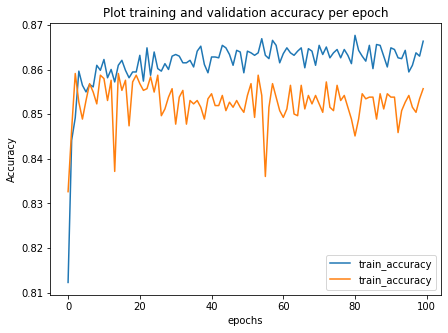

In [0]:
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='train_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()

#### **Plot training and validation loss per epoch**

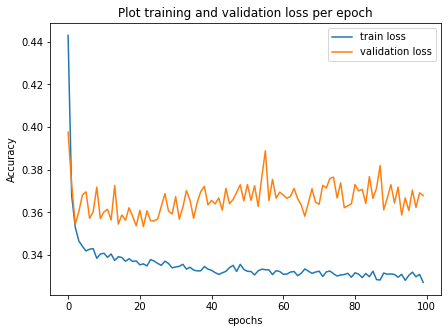

In [0]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

#### **Part 3 - Making the predictions and evaluating the model**


In [0]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [0]:
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.76      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



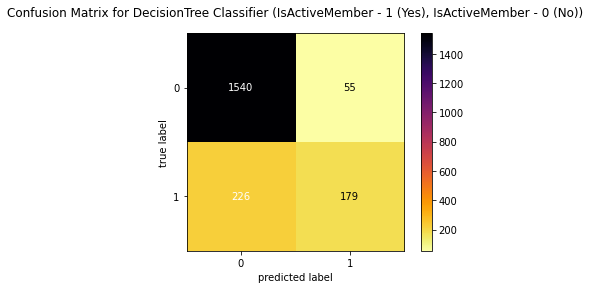

In [0]:

from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=cm, cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for DecisionTree Classifier (IsActiveMember - 1 (Yes), IsActiveMember - 0 (No))')
plt.show()